#Airplane Prices

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline
# !pip install mlxtend --upgrade

##EDA

In [42]:
prices = pd.read_csv('Predict Price of Airline Tickets.csv')
prices.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [43]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [44]:
prices.shape

(10683, 11)

In [45]:
prices.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [46]:
prices.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [47]:
prices.dropna(inplace=True)
prices.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [48]:
prices.duplicated().sum()

220

In [49]:
#Removing the duplicated rows (Records):
prices.drop_duplicates(inplace=True)

print('Shape after removing the duplicated rows (Records):',prices.shape)

Shape after removing the duplicated rows (Records): (10462, 11)


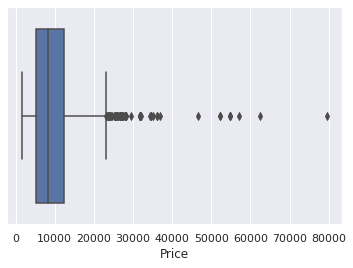

In [50]:
#Finding outliers of the house prices
sns.boxplot(data = prices , x = 'Price')

In [51]:
#Finding information about these outliers
prices[prices['Price']>53000]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,16:55,23:00,6h 5m,1 stop,No info,54826
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR ? MAA ? DEL,09:45,14:25,4h 40m,1 stop,Business class,57209


In [52]:

print(prices[prices['Price']>53000]['Source'])
print("--------------------------")
print(prices[prices['Price']>53000]['Destination'])
print("--------------------------")
print(prices[prices['Price']>53000]['Airline'])
print("--------------------------")
print(prices[prices['Price']>53000]['Date_of_Journey'])

#Insights :    --> Most of the outliers have a common Source of departure "Banglore"
#              --> Most of the outliers have a common destination  "New Delhi"
#              --> Most of the outliers have a common Airline  "Jet Airways"
#              --> Most of the outliers happened in month 3 "March" on the 1st and the 18th
 

1478     Banglore
2618     Banglore
2924     Banglore
5372     Banglore
5439     Banglore
10364    Banglore
Name: Source, dtype: object
--------------------------
1478     New Delhi
2618     New Delhi
2924     New Delhi
5372     New Delhi
5439     New Delhi
10364    New Delhi
Name: Destination, dtype: object
--------------------------
1478              Jet Airways
2618              Jet Airways
2924     Jet Airways Business
5372     Jet Airways Business
5439              Jet Airways
10364    Jet Airways Business
Name: Airline, dtype: object
--------------------------
1478     18/03/2019
2618     18/03/2019
2924     01/03/2019
5372     01/03/2019
5439     01/03/2019
10364    01/03/2019
Name: Date_of_Journey, dtype: object


[Text(0.5, 1.0, 'Total_Stops')]

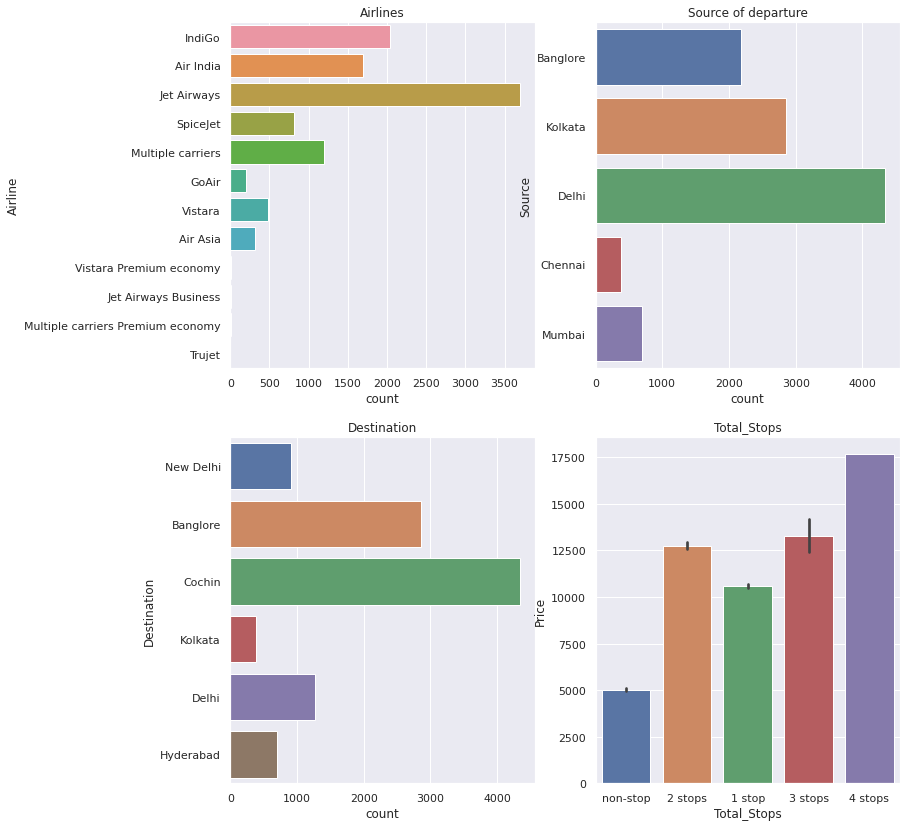

In [53]:
fig,axes=plt.subplots(2,2,figsize=(12,14))

sns.countplot(data = prices , y = "Airline" , ax = axes[0,0] ).set(title = 'Airlines')
sns.countplot(data = prices , y = "Source" , ax = axes[0,1]).set(title = 'Source of departure')
sns.countplot(data = prices , y = "Destination" , ax = axes[1,0]).set(title = 'Destination')
sns.barplot(data = prices , x = "Total_Stops" , y = "Price" , ax = axes[1,1]).set(title = 'Total_Stops')
# Comments : --> The most common airline in this data is JetAirways
          #  --> The most common departure place is Delhi
          #  --> The most common destination place is Cochin
          #  --> Trips with more stops are more expensive

In [54]:
prices['Date_of_Journey']= pd.to_datetime(prices['Date_of_Journey'], format= '%d/%m/%Y')

#Extracting Months and days names from the Date_of_Journey column 
prices["Months"]= prices['Date_of_Journey'].dt.month_name()
prices['Days'] = prices['Date_of_Journey'].dt.day_name()

prices.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Months,Days
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,March,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,May,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,June,Sunday
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,May,Sunday
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,March,Friday


[Text(0.5, 1.0, 'Month_flights')]

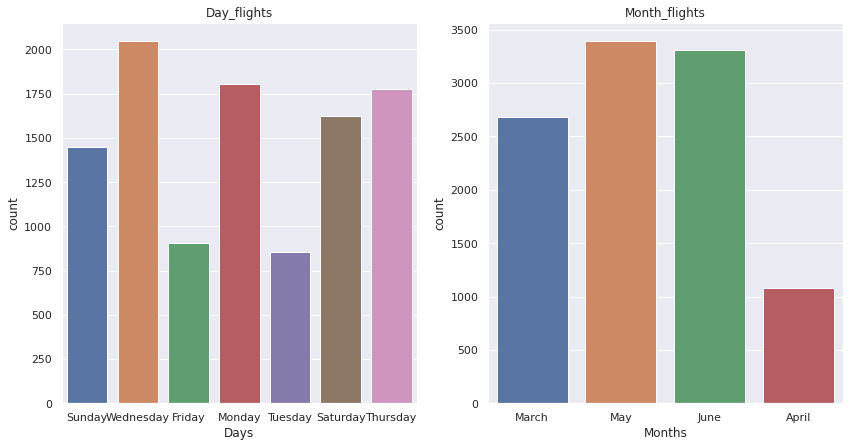

In [55]:
fig,axes=plt.subplots(1,2,figsize=(14,7))

sns.countplot(data = prices  , x = "Days" , ax = axes[0] ).set(title = 'Day_flights')
sns.countplot(data = prices  , x = "Months" , ax = axes[1] ).set(title = 'Month_flights')

#Insights : -->Most Day with flights is Wednesday and the least are Friday and Tuesday
#           -->Months with flight travels existing in this dataset are only 4 months (March,May,June,April), and the least is april

In [56]:
# Extracting Hours
prices["Dep_hour"] = pd.to_datetime(prices["Dep_Time"]).dt.hour

# Extracting Minutes
prices["Dep_min"] = pd.to_datetime(prices["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
prices.drop(["Dep_Time"], axis = 1, inplace = True)

# Extracting Hours
prices["Arrival_hour"] = pd.to_datetime(prices['Arrival_Time']).dt.hour

# Extracting Minutes
prices["Arrival_min"] = pd.to_datetime(prices['Arrival_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
prices.drop(["Arrival_Time"], axis = 1, inplace = True)


In [57]:
prices["Arrival_Time"] = prices["Arrival_hour"] + prices["Arrival_min"] *(1/60)
prices["Dep_Time"] = prices["Dep_hour"] + prices["Dep_min"] *(1/60)
prices.drop(["Arrival_hour"], axis = 1, inplace = True)
prices.drop(["Arrival_min"], axis = 1, inplace = True)
prices.drop(["Dep_hour"], axis = 1, inplace = True)
prices.drop(["Dep_min"], axis = 1, inplace = True)

prices.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Months,Days,Arrival_Time,Dep_Time
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,March,Sunday,1.166667,22.333333
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,May,Wednesday,13.250000,5.833333
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,June,Sunday,4.416667,9.416667
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,May,Sunday,23.500000,18.083333
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,March,Friday,21.583333,16.833333


In [58]:
h = prices['Duration'].str.extract('(\d+)h', expand=False).astype(float)
m = prices['Duration'].str.extract('(\d+)m', expand=False).astype(float)
M = m.replace(np.nan,0)
H = h.replace(np.nan,0)
prices['dur'] = H + M *(1/60)
prices.drop(["Duration"],axis=1,inplace=True)

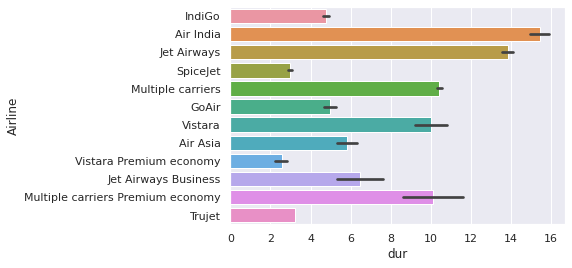

In [59]:
sns.barplot(data = prices , y = 'Airline' , x = 'dur' )
#Comment: 
#         --> on average Air india airline takes the longest time (slowest)
#         --> while Visatra Premium economy takes the least time (fastest)

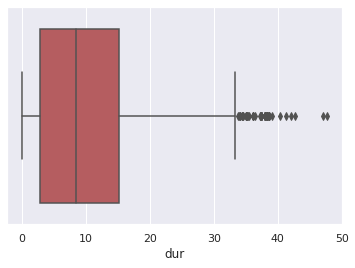

In [60]:
#identifying flights that took too long
sns.boxplot(data = prices,x="dur" , color = 'r')

In [61]:
prices[prices["dur"]>45]

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Months,Days,Arrival_Time,Dep_Time,dur
1067,Jet Airways,2019-03-03,Delhi,Cochin,DEL ? IDR ? BOM ? COK,2 stops,No info,20064,March,Sunday,4.416667,5.416667,47.000000
10456,Jet Airways,2019-03-06,Delhi,Cochin,DEL ? AMD ? BOM ? COK,2 stops,No info,20694,March,Wednesday,18.833333,19.166667,47.666667


In [62]:
prices["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

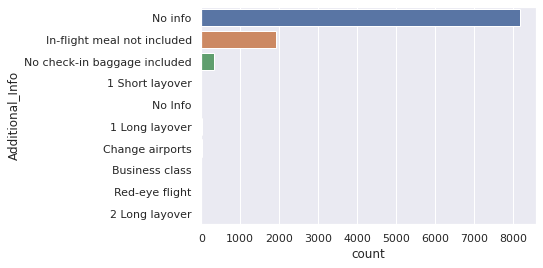

In [63]:
sns.countplot(data = prices , y = 'Additional_Info')
prices['Additional_Info'].value_counts()

In [64]:
#Converting categorical features into numerals to be able to train with them

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
Airline_label  = le.fit_transform(prices['Airline'])
Source_label = le.fit_transform(prices['Source'])
Destination_label = le.fit_transform(prices['Destination'])
Total_Stops_label  = le.fit_transform(prices['Total_Stops'])
 
prices.drop('Airline', axis=1, inplace=True)
prices.drop('Source', axis=1, inplace=True)
prices.drop('Destination', axis=1, inplace=True)
prices.drop('Total_Stops', axis=1, inplace=True)
 
prices['Airline'] = Airline_label 
prices['Source'] = Source_label 
prices['Destination'] = Destination_label 
prices['Total_Stops'] = Total_Stops_label 


In [65]:
prices["Days"] = prices["Date_of_Journey"].dt.day_of_week
prices["Months"] = prices["Date_of_Journey"].dt.month

#Then dropping that column as it is of no use.
prices.drop('Date_of_Journey', axis = 1 ,inplace = True)

In [66]:
#Converting categorical features into numerals to be able to train with them

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
Route_label  = le.fit_transform(prices['Route'])
Additional_Info_label = le.fit_transform(prices['Additional_Info'])

 
prices.drop('Route', axis=1, inplace=True)
prices.drop('Additional_Info', axis=1, inplace=True)

 
prices['Route'] = Route_label 
prices['Additional_Info'] = Additional_Info_label 


prices.head()


,Price,Months,Days,Arrival_Time,Dep_Time,dur,Airline,Source,Destination,Total_Stops,Route,Additional_Info
0,3897,3,6,1.166667,22.333333,2.833333,3,0,5,4,18,8
1,7662,5,2,13.250000,5.833333,7.416667,1,3,0,1,84,8
2,13882,6,6,4.416667,9.416667,19.000000,4,2,1,1,118,8
3,6218,5,6,23.500000,18.083333,5.416667,3,3,0,0,91,8
4,13302,3,4,21.583333,16.833333,4.750000,3,0,5,0,29,8


[Text(0.5, 1.0, 'Route')]

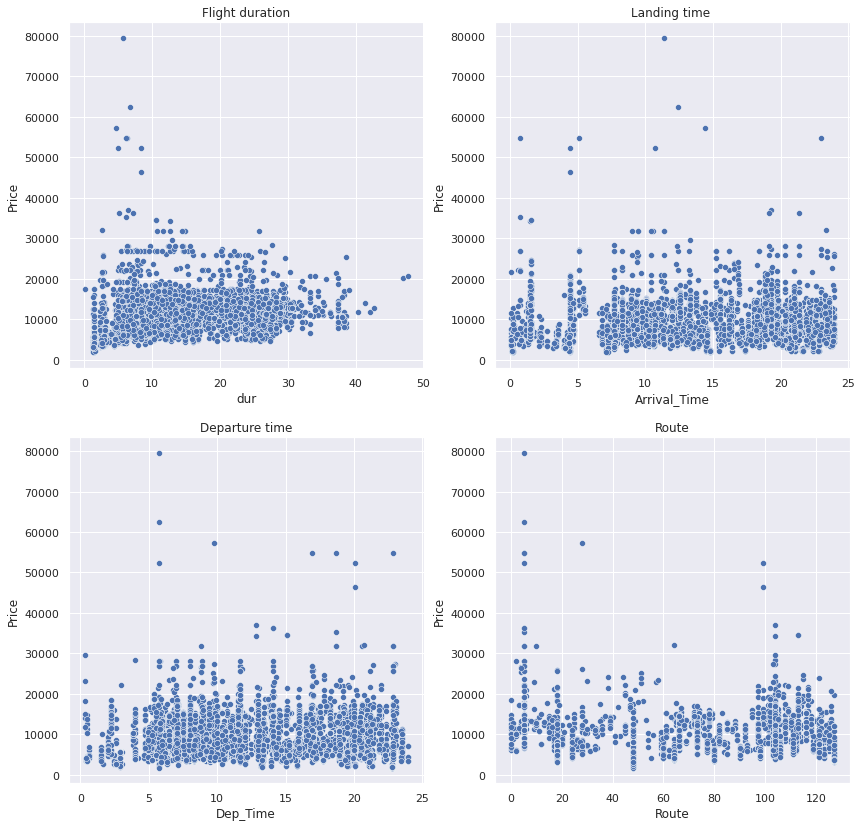

In [67]:
fig,axes=plt.subplots(2,2,figsize=(14,14))

sns.scatterplot(data = prices , x = 'dur' , y = 'Price' , ax = axes[0,0]).set(title = 'Flight duration')
sns.scatterplot(data = prices , x = 'Arrival_Time' , y = 'Price' , ax = axes[0,1]).set(title = 'Landing time ')
sns.scatterplot(data = prices , x = 'Dep_Time' , y = 'Price' , ax = axes[1,0]).set(title = 'Departure time')
sns.scatterplot(data = prices , x = 'Route' , y = 'Price' , ax = axes[1,1]).set(title = 'Route')

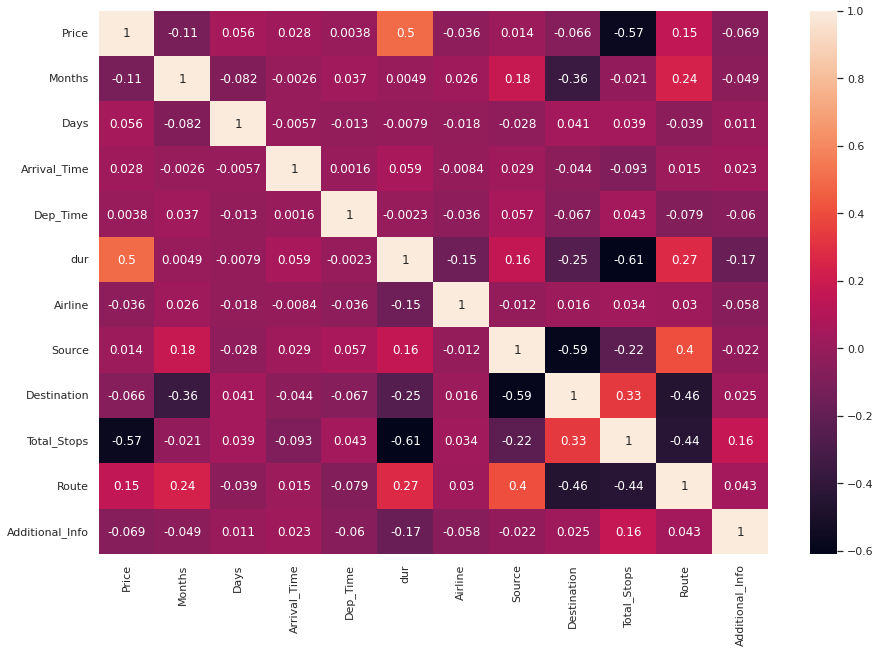

In [68]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=prices.corr(),annot=True) 

##Comments:
Insights :    
--> Most of the outliers have a common Source of departure "Banglore".

--> Most of the outliers have a common destination  "New Delhi".

--> Most of the outliers have a common Airline  "Jet Airways".

--> Most of the outliers happened in month 3 "March" on the 1st and the 18th.

-->Most Day with flights is Wednesday and the least are Friday and Tuesday.

-->Months with flight travels existing in this dataset are only 4 months (March,May,June,April), and the least is april.

--> on average Air india airline takes the longest time (slowest).

--> while Visatra Premium economy takes the least time (fastest).

##Machine Learning Models

Polynomial regression model

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x = prices[['Days', 'Arrival_Time', 'Dep_Time', 'dur', 'Airline',
             'Total_Stops', 'Route', 'Additional_Info']].values
y = prices['Price'].values

poly_reg = PolynomialFeatures(degree=3)

x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test  = train_test_split(x_poly,y, test_size=0.33, random_state = 1)

In [70]:
LR_model= linear_model.LinearRegression()

LR_model.fit(x_train,y_train)

y_pred = LR_model.predict(x_test)

In [71]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


MAE = metrics.mean_absolute_error(y_test,y_pred)

MSE = metrics.mean_squared_error(y_test,y_pred)

RMSE = np.sqrt(MSE)

R2_score = metrics.r2_score(y_test,y_pred)


print(' mean_absolute_error= ', MAE)
print(' mean_squared_error= ', MSE)
print(' Root mean_squared_error= ', RMSE)
print(' R2_score= ', R2_score)

 mean_absolute_error=  1940.5637767178125
 mean_squared_error=  7540844.784208907
 Root mean_squared_error=  2746.0598653723678
 R2_score=  0.6257711910602842


In [72]:
from mlxtend.evaluate import bias_variance_decomp

avg_loss, avg_bais, avg_variance = bias_variance_decomp(LR_model,x_train,y_train,x_test,y_test, loss = 'mse', random_seed=32, num_rounds=200)

print('Average Loss = ', avg_loss)
print('Average bais = ', avg_bais)
print('Average variance = ', avg_variance)

Average Loss =  8794567.93100992
Average bais =  7232347.7887962
Average variance =  1562220.1422137201


***Decision Tree :***

In [73]:
from sklearn.model_selection import train_test_split

x = prices[[ 'Days', 'Arrival_Time', 'Dep_Time', 'dur', 'Airline',
             'Total_Stops', 'Route', 'Additional_Info']].values
y = prices['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=20)

In [74]:
from sklearn.tree import DecisionTreeRegressor

D_T_regressor = DecisionTreeRegressor()

D_T_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [75]:
from sklearn import metrics

y_pred = D_T_regressor.predict(x_test)

print('mean squared Error = ', metrics.mean_squared_error(y_test,y_pred)) 
print('mean Absolute Error = ', metrics.mean_absolute_error(y_test,y_pred)) 

mean squared Error =  6704369.876150396
mean Absolute Error =  1311.42237617455


***Random forest model:***

In [76]:
from sklearn.model_selection import train_test_split
x = prices[[ 'Days', 'Arrival_Time', 'Dep_Time', 'dur', 'Airline',
             'Total_Stops', 'Route', 'Additional_Info']].values
y = prices['Price'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 20)

In [77]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

regressor.fit(x_train,y_train)

RandomForestRegressor()

***Evaluation Metrics***

In [78]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(x_test)

MAE = metrics.mean_absolute_error(y_test,y_pred)

MSE = metrics.mean_squared_error(y_test,y_pred)

RMSE = np.sqrt(MSE)

R2_score = metrics.r2_score(y_test,y_pred)


print(' mean_absolute_error= ', MAE)
print(' mean_squared_error= ', MSE)
print(' Root mean_squared_error= ', RMSE)
print(' R2_score= ', R2_score)

 mean_absolute_error=  1198.584318571114
 mean_squared_error=  5565004.925600118
 Root mean_squared_error=  2359.026266407417
 R2_score=  0.7564264625653676


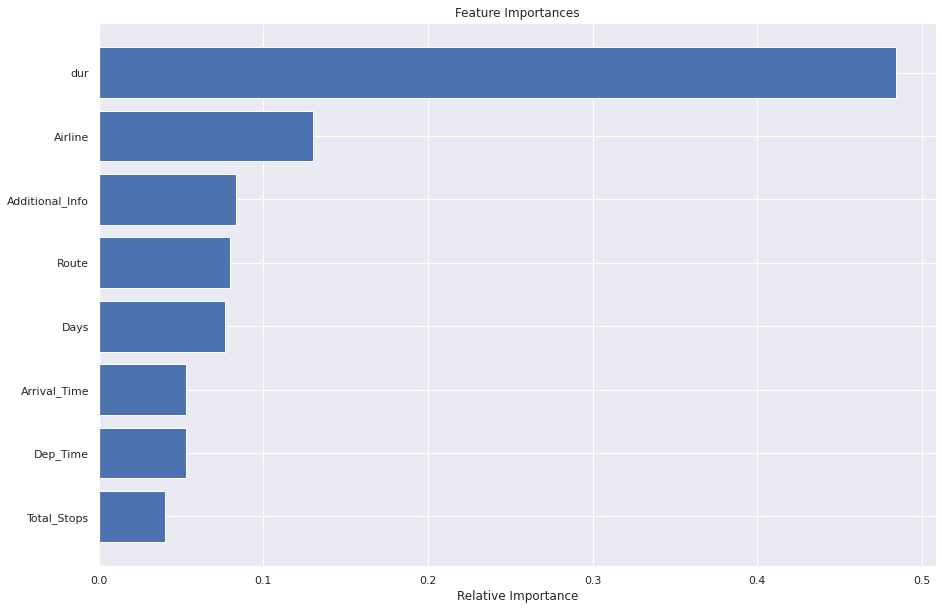

In [79]:
import matplotlib.pyplot as plt

columns_name = [ 'Days', 'Arrival_Time', 'Dep_Time', 'dur', 'Airline',
                 'Total_Stops', 'Route', 'Additional_Info']

importances = regressor.feature_importances_

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align='center')
plt.yticks(range(len(indices)),[columns_name[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

In [80]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, random_state= 2485, shuffle=True)

scores = cross_val_score(regressor, x,y, scoring='neg_mean_squared_error', cv=cv)

print('mean_squared_error', np.mean(np.absolute(scores)))

mean_squared_error 5343928.985021783
